# Práctica 1: Análisis exploratorio de datos, preprocesamiento y validación de modelos de clasificación.
## Minería de Datos
### Curso académico 2022-2023
Realizado por: 
* Domingo José Caballero Navarro 
* Rubén Castillo Carrasco

<a id="índice"></a>
<h2><font size=5>Índice</font></h2>

* [1. Introducción](#introduccion)
* [2. Almacenamiento de datos](#almacenamiento)
* [3. Análisis exploratorio de datos](#analisis)
* [4. Preprocesamiento de datos](#preprocesamiento)
* [5. Validación de modelos](#validacion)

# <a id="introduccion"></a>
# <font> 1. Introducción</font>
En esta práctica se llevará a cabo un análisis exploratorio sobre una base de datos del Titanic, además, un preprocesamiento de dichos datos y una validación de modelos. El objetivo principal es aprender a interpretar los datos para una buena preparación y aprender a interpretar los resultados de los distintos modelos.

In [1]:
seed = 27912

In [1]:
from sklearn.utils import all_estimators
filter = None
estimators = all_estimators(filter)
estimators = dict(estimators) 

# <a id="almacenamiento"></a>
# <font> 2. Almacenamiento de datos</font>
En primer lugar, empezaremos nuestra práctica cargando los datos de entrenamientos proporcionados por Kaggle, dicha base de datos se llama train.csv. Una vez cargada la base de datos, deberemos determinar la división entre base de entrenamiento y base de test, uan vez realizada dicha división podemos empezar a realiza un análisis exploratorio sobre los datos.

In [3]:
import os
path = os.path.join(os.path.sep, "data", "workspace_files", "train.csv")

In [4]:
identifier = "PassengerId"
target = "Survived"
dtype = {target: "category"}
arguments = {"filepath_or_buffer": path, "index_col": identifier, "dtype": dtype}

In [5]:
import pandas as pd
data = pd.read_csv(**arguments)


Primero de todo, antes de realizar una visualización deberemos dividir la base de datos en dos, una para el entrenamiento a la que llamaremos train y otra para el test. Lo realizaremos antes de dicha visualización para que no afecte a nuestra percepción sobre los datos y no influya en nuestras tomas de decisiones. Para ello utilizaremos el método `train_test_split()` proporcionado por Scikit-Learn.

Pero antes de aplicar directamente dicho método tendremos que comprobar que distribución sigue la variable clase en nuestro data set. Una vez comprobada la distrución realizaremos la partición entre los datos de entrenamiento y los datos de test.

In [6]:
import numpy as np
_,counts = np.unique(data[target], return_counts=True)

class_0 = counts[0]/(counts[0]+counts[1])
class_1 = counts[1]/(counts[0]+counts[1])

print(class_0,class_1)

0.6161616161616161 0.3838383838383838


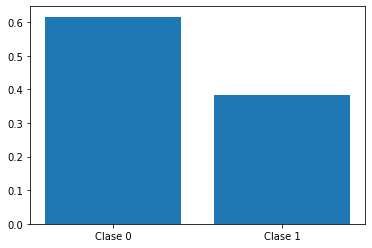

In [7]:
import matplotlib.pyplot as plt
plt.bar(['Clase 0','Clase 1'],[class_0,class_1])
plt.show()

Como podemos observar nuestro data set tiene una mayor proporción para los valores de la clase 0 que para los valores de la clase 1, es decir, nuestro data set no está balanceado. Por lo tanto, consideraremos que nuestro set de test y nuestro set de entrenamiento debe seguir la misma distribución, para conseguir esto podemos utilizar el parámetro `stratify` del métedo train_test_split. Dicho parámetro se encarga de dividir la misma distribución de la variable clase para los set de entrenamiento y de test.

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size =0.3, stratify=data[target])

In [9]:
_,train_counts = np.unique(train[target], return_counts=True)

train_class_0 = train_counts[0]/(train_counts[0]+train_counts[1])
train_class_1 = train_counts[1]/(train_counts[0]+train_counts[1])

print(train_class_0,train_class_1)

0.6163723916532905 0.38362760834670945


In [10]:
_,test_counts = np.unique(test[target], return_counts=True)

test_class_0 = test_counts[0]/(test_counts[0]+test_counts[1])
test_class_1 = test_counts[1]/(test_counts[0]+test_counts[1])

print(test_class_0,test_class_1)

0.6156716417910447 0.3843283582089552


Una vez realizada la división entre nuestra base de datos de entrenamiento y de test ya estamos listos para hacer un análisis exploratorio sobre nuestros datos de entrenamiento. El test solo podrá ser usado al final de la creación de nuestros modelos para la validación. Podemos realizar una pequeña muestra de la base de entrenamiento para comprobar que todo ha sido cargado correctamente.

In [11]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C


# <a id="analisis"></a>
# <font> 3. Análisis exploratorio de datos</font>
A continuación, continuaremos con el análisis exploratorio de datos o EDA (_Exploratory Data Analysis_). Para realizar un buen análisis de nuestros datos tendremos que tener muy en cuenta ciertas cosas:
* ¿De cuántos datos disponemos?
* ¿Cuántos datos se han perdido?
* ¿Qué datos son discretos y cuáles son continuos?
* ¿La variable clase está balanceada? ¿Qué distribución siguen?
* ¿Son todas las variables predictoras importantes? ¿Existe correlación entre variables predictoras?
* ¿Existe valores outliers? ¿Hay sesgo en los datos?

Una vez presentado las principales cuestiones que nos tenemos que hacer sobre nuestro conjunto de datos podemos empezar. Para ello comenzaremos comprendiendo como está formada nuestra base de datos e identificaremos los tipos que corresponden a las variables predictoras. Comenzamos dividiendo entre variable clase, la y, y las variables predictoras, la X.

In [12]:
arguments = {"labels": target, "axis": "columns"}

In [13]:
X = train.drop(**arguments)

In [14]:
y = train[target]

Primero de todo analizaremos cada variable predictora, qué tipo es y que datos la conforman, así diferenciaremos entre las variables discretas y las variables continuas. Además, podemos determinar si existen variables de las cuales podemos prescindir o no. Tenemos las siguientes variables predictoras:
 * __Pclass__: La variable Pclass diferencia entre las distintas clases de billete que hay posibles, se encuentran en el rango [1,3]. Está variable es una aproximación del nivel socio-económico de cada pasajero. Además, la podemos considerar una variable discreta dado que bien es 1: Upper, 2: Middle, o bien es 3: Lower.
  
 * __Name__: Indica el nombre de cada pasajero. Es una variable que no aportada ninguna información respecto al resto, es como un identificador. Por lo tanto, podemos prescindir de dicha variable modificando nuestro train set para ser más eficiente en espacio.
 * __Sex__: Indica si el pasajero es hombre o mujer. Se trata de una variable discreta.
 * __Age__: Indica la edad del pasajero, la cuál está representada de la siguiente forma: si se trata de un bebe con menos de un año se representa con un número comprendido entre 0 y 1; a partir de un año se representa una estimación de edad que bien puede ser un número entero o bien un número y medio, de tal forma que el rango de representación es: [1, 1.5, 2, 2.5, ...].
 * __SibSp__: Indica el número de hermanos, hermanastros, marido o mujer que viajan a bordo relacionados con dicho pasajero.
 * __Parch__: Indica el número de padres, hijos o hijastros que viajan a bordo relacionados con dicho pasajero.
 * __Ticket__: Representa el identificador para el billete. Se trata de valores únicos por lo tanto también podemos prescindir de dicha variable dado que no nos aporta información al problema.
 * __Fare__: Indica la tarifa de pasajero, está representado mediante un valor númerico.
 * __Cabin__: Indicica en que cabina se encontraba el pasajero. 
 * __Embarked__: Representa desde que puerto se embarco, se trata de una variable discreta en la que encontramos tres posibles valores: C = Cherbourg, Q = Queenstown y S = Southampton.

Una vez analizado que variables componen nuesta base de datos podemos hacer uso del método .info() para sacar más información como el tipo de datos en el que esta almacenado cada variable

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 599 to 805
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Name      623 non-null    object 
 2   Sex       623 non-null    object 
 3   Age       496 non-null    float64
 4   SibSp     623 non-null    int64  
 5   Parch     623 non-null    int64  
 6   Ticket    623 non-null    object 
 7   Fare      623 non-null    float64
 8   Cabin     136 non-null    object 
 9   Embarked  621 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 53.5+ KB


Si analizamos la información que nos muestra X.info() podemos observar como existen valores null en nuestro set de entrenamiento, encontramos las variables Age, Cabin y Embarked. Para las variables Age y Embarked se puede realizar un tratamiento para estimar los valores posibles para las instancias perdidas. Pero en el caso de la variable Cabin encontramos muchas instancias perdidas, un 77% de los datos son null, por lo tanto, tendremos que prescindir de dicha variable predictora.

### Análisis univariado
Para realizar un estudio un poco más específico de cada varaible que compone nuestra base de datos, empezaremos a estudiar cada variable de forma individualizada y la distribucion seguida por cada una de ellas.

* Para ello, comenzamos con __Name__, que, a priori, sabemos que aporta nula información. Al realizar el estudio se tiene que cada instancia es única, es decir, no existen dos personas con el mismo nombre en nuestro conjunto de entrenamiento. Esto lo demostramos de la siguiente manera:

In [16]:
(elem,veces)=np.unique(X["Name"],return_counts=True)
sinRep=sum(i for i in veces if i==1)
dosOMas=sum(i for i in veces if i>1)
print(f"Hay un total de {sinRep} nombres unicos")
print(f"Hay un total de {dosOMas} nombres repetidos")

Hay un total de 623 nombres unicos
Hay un total de 0 nombres repetidos


Es por ello que podemos decir que esta variable no aporta nada a nuestro conjunto de entrenamiento de cara a hacer una predicción. Para este caso, dado que solo hay una isntancia con cada nombre, la distribución de probablidad de cada uno de estos para nuestro conjunto de entrenamiento será de 1/(numero_instancias)= 1/623

* Para la variable __Sex__ podemos decir que estamos ante una varaible discreta, con dos valores posibles, male y female: 
Si estudiamos la distribucion de estos dos, observamos que la mayoría de las instancias tienen como valor male, estando esta presente en un 65% del total de las instancias, mientras que female es minoritaria, estando presente en un 35%. Como se ha visto anteriomente, no se dan instancias con valores nulos para esta variable.

['female' 'male'] [219 404]
La prob de hombre es de 0.6484751203852327
La prob de mujer es de 0.35152487961476725


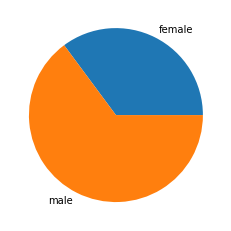

In [17]:
sex,nums =np.unique(X["Sex"], return_counts=True) 
print(sex,nums)
female_prob=nums[0]/sum(nums)
male_prob=nums[1]/sum(nums)
print(f"La prob de hombre es de {male_prob}")
print(f"La prob de mujer es de {female_prob}")

import matplotlib.pyplot as plt

plt.pie(nums, labels=sex)
plt.show()

* Para __Age__, al tratarse de una variable continua, donde pueden aparecer valores de tipo no enteros, trataremos de estudiar que distribución sigue. El estudio de la distribución nos indica que, para nuestro conjunto de entrenamiento, la media de esdad es cercana a los 30 años, con una desviación tipica cercana a los 15. Además, el rango de edades abarca entre los 0.67 años y los 80, siendo 28 años la mediana. La distribución, al represenatarla de forma gráfica, observamos que esta se podría tratar como una dsitribución normal, pero con valor algo disparado en el primer bin.

count    496.000000
mean      29.879879
std       14.483858
min        0.420000
25%       21.000000
50%       28.000000
75%       38.250000
max       80.000000
Name: Age, dtype: float64


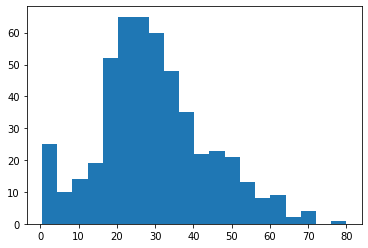

In [18]:
print(X["Age"].describe())


plt.hist(X["Age"],bins=20) 
plt.show()

* __SibSP__ es una variable de tipo entera donde se indica el numero de hermanos, esposas o maridos que tiene a bordo  un determinado pasajero. Si realizamos un estudio de esta, obtenemos que más de la mitad de pasajeros no tienen a ninguno a bordo, al ser la mediana 0. La media es de aproximadamente 0.5  a bordo, y existe al menos una instancia que tiene hasta 8 hermanos y/o marido o esposa a bordo. Representandolo graficamente, observamos ques esta variable sigue una distribución concentrada a la izquierda, que va decreciendo de forma muy rapida, existiendo muy pocas istancias del problema con esta varaible con valor mayor a 3 para nuestro conjunto de entrenamiento.

count    623.000000
mean       0.513644
std        1.065110
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
El porcentaje de pasajeros sin hermanos ni esposa a bordo es de 0.6789727126805778


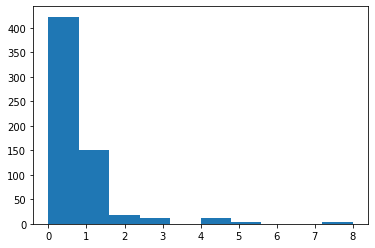

In [19]:
print(X["SibSp"].describe())

plt.hist(X["SibSp"]) 
plt.show()

sib,num=np.unique(X["SibSp"],return_counts=True)

print(f"El porcentaje de pasajeros sin hermanos ni esposa a bordo es de {num[0]/sum(num)}")

* En cuanto a la variable __ParCh__, que indica el numero de padres e hijos/hijastros a bordo, podemos observar que se trata de una variable de tipo entera, donde, de nuevo, la mayoria de instancias tienen como valor 0. En este caso, para nuestro conjunto de entrenamiento el maximo tiene como valor 5, y la media es ligeramente inferior que para SibSp. La distribución que sigue, de nuevo, al igual que sucede con la variable SibSp, esta fuertemente concentrada a la izquierda, decreciendo de forma muy significativa para valores del eje de abscisas mayores.

count    623.000000
mean       0.365971
std        0.804488
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
[0 1 2 3 4 5 6]
[483  75  54   4   3   3   1]


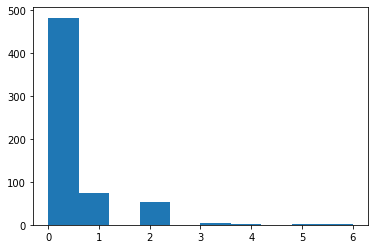

In [20]:
print(X["Parch"].describe())
plt.hist(X["Parch"]) 
plt.show()

sib,num=np.unique(X["Parch"],return_counts=True)
print(sib)
print(num)

* Para la variable __Ticket__, si realizamos un estudio más completo de esta podemos observar que, en nuestro conjunto de entrenamiento aparecen hasta un total de 500 tickets distintos, por lo tanto, dado que no hay valores nulos en ninguna de las instancias de nuestro conjunto de entrenamiento para esta variable, hay un total de 120 instancias con valores ya presentes en el conjunto de entrenamiento. A priori podemos intuir qeu esto se debe a que los miembros de una familia para, por ejemplo los niños pequeños, compartan el numero de ticket con el de sus padres. 

    Al existir tantos valores unicos de esta variable, funcionando casi como un identificador, carece claramente de potencia discriminatoria de cara a la elaboración de nuestros clasificadores, y, por lo tanto, la eliminaremos junto con la variable Name en el tratamiento de los datos.

In [21]:
print(X["Ticket"].describe())
ticket,cantidad = np.unique(X["Ticket"], return_counts=True)

print("Un ejemplo de el valor de Ticket para 5 instancias seria: ",np.random.choice(ticket,size=5))

masDe3=[1 for i in cantidad if(i>3)]
print(f"\nHay un total de {sum(masDe3)} tickets que se repiten en mas de 3 pasajeros para el conjunto de entrenamiento")

count         623
unique        505
top       CA 2144
freq            5
Name: Ticket, dtype: object
Un ejemplo de el valor de Ticket para 5 instancias seria:  ['345765' '363294' '345774' 'A/5 21171' 'SC/AH 29037']

Hay un total de 10 tickets que se repiten en mas de 3 pasajeros para el conjunto de entrenamiento


* __Fare__: es una varaible de tipo float que indica el precio del billete pagado. Por ello es podemos decir que, dado que como puede tomar cualquier valor numérico, estamos ante una variable de tipo contínua. Como hemos visto anteriormente, esta no contiene valores nulos en ninguna de las instancias de nuestro conjunto de entrenamiento. Al representarla gráficamente, podemos destacar que esta sigue una distribución claramente concentrada a la izquierda, presentado valores extremos aislados hacia la derecha, que indican un coste mayor del billete. Podemos ver que la mediana es cercana a 13 mientras que la media es casi el triple que esta, al estar muy afectada por los valores extremos. 

count    623.000000
mean      30.974417
std       48.418353
min        0.000000
25%        7.925000
50%       13.500000
75%       30.035400
max      512.329200
Name: Fare, dtype: float64


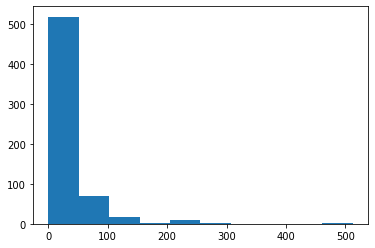

In [22]:
print(X["Fare"].describe())

plt.hist(X["Fare"]) 
plt.show()

* La variable Cabin almacena cadenas de carácteres, donde se indica la cabina que hace uso un pasajero. Como hemos visto anteriormente, esta variable contiene valor nulo para la mayoria de las instancias de nuestro conjunto de entrenamiento. Esto, sumado con el escaso poder discriminador que tiene, causado por la gran cantidad de valores que puede tomar esta varaible categórica, harán que, de cara al preprocesamiento de nuestros datos prescindamos de esta. En las instancias que si que toma valores no nulos, destacamos que para 87 de estas tienen un valor que no se repite más en el conjunto de entrenamiento, 24 se repiten solo una vez y unicamente 5 aparecen en mas de una instancia en nuestro conjunto de entrenamiento.

In [23]:
print(X["Cabin"].describe())

cabinas, cant = np.unique(X["Cabin"].astype(str), return_counts=True)
unaVez=[1 for i in cant if(i==1)]
dosVeces=[1 for i in cant if(i==2)]
masDosVeces=[1 for i in cant if(i>2)]
print(f"El numero de instancias cuyo valor de Cabin no se repite en el conjunto de entrenamiento es de {sum(unaVez)}")
print(f"El numero de instancias cuyo valor de Cabin se repite en el conjunto de entrenamiento otra vez es de {sum(dosVeces)}")
print(f"El numero de instancias cuyo valor de Cabin se repite dos veces en el conjont de entrenamiento es de {sum(masDosVeces)-1}") #Eliminamos la de unique

count     136
unique    107
top        G6
freq        4
Name: Cabin, dtype: object
El numero de instancias cuyo valor de Cabin no se repite en el conjunto de entrenamiento es de 82
El numero de instancias cuyo valor de Cabin se repite en el conjunto de entrenamiento otra vez es de 23
El numero de instancias cuyo valor de Cabin se repite dos veces en el conjont de entrenamiento es de 2


* Por último, la variable embarked es de tipo discreta, al tomar valores de un conjunto finito. Cabe destacar que en nuestro conjunto de entrenamiento podemos observar que solo hay 2 instancias que almacenan valores nulos en nuestro conjunto de entrenamiento, algo que tendremos que tener en cuenta en el tratamiento postorior de los mismos. Para este atributo, dentro de nuestro conjunto de entrenamiento encontramos 3 valores distintos, excluyendo los nulos. Estos son 'S', que aparece en un 72% de las instancias, seguido de "C", con un 18%,y por ultimo "Q" que aparece en un 7%. Podemos ver esto de forma más visual con un diagrama de sectores:
        

count     621
unique      3
top         S
freq      454
Name: Embarked, dtype: object
['C' 'Q' 'S' 'nan']
[113  54 454   2]
La proporcion de clases C es de 0.18138041733547353
La proporcion de clases Q es de 0.08667736757624397
La proporcion de clases S es de 0.7287319422150883


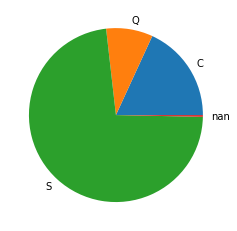

In [24]:
print(X["Embarked"].describe())

clases,cantidad = np.unique(X["Embarked"].astype(str),return_counts=True)

plt.pie(cantidad, labels=clases)
plt.show()

print(clases)
print(cantidad)
print(f"La proporcion de clases C es de {cantidad[0]/sum(cantidad)}")
print(f"La proporcion de clases Q es de {cantidad[1]/sum(cantidad)}")
print(f"La proporcion de clases S es de {cantidad[2]/sum(cantidad)}")

### Análisis multivariado
A continuación, importaremos las librería `seaborn` para visualizar gráficamente las correlaciones entre las distintas variables predictoras. Analizando así si podemos aprovechar varias variables como una única variable conjunta.

In [25]:
import seaborn as sns

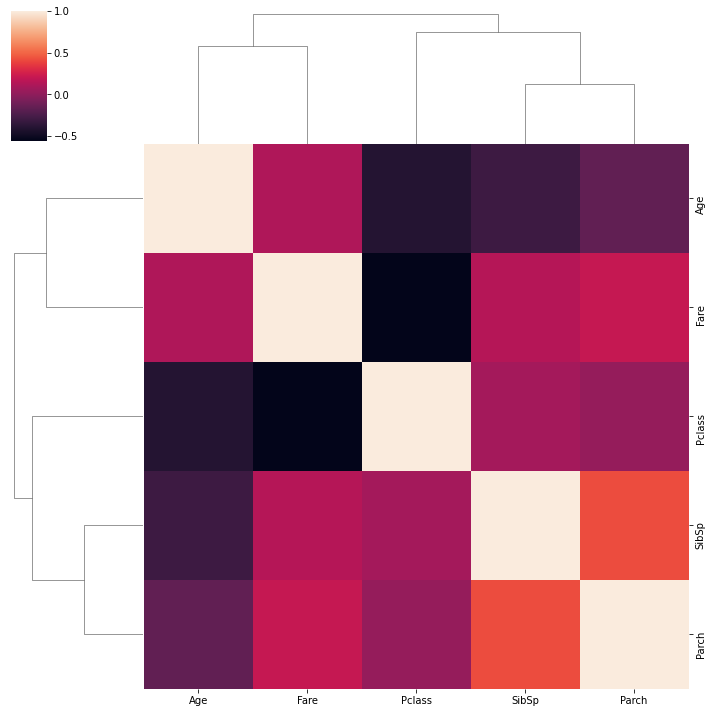

In [26]:
corr = X.corr()
sns.clustermap(corr)

Si observamos el mapa de calor resultante de las variables predictoras podemos concluir que casi todas las variables aportan suficiente información por si solas, exceptuando el caso de las variables SibSp y Parch que tienen una mayor correlación. Esto último se debe a que la variable SibSp se refiere a el número de hermanos o parejas a bordo del Titanic, y la variable Parch se refiere al número de familiares a bordo del Titanic.

In [27]:
X["SibSp"].corr(X["Parch"])

0.4182007509570645

Si observamos la correlación entre las dos variables mencionadas anteriormente vemos que se trata de un 0.4, un valor que no es suficientemente significativo como para prescindir de ambas variables y juntarlas en una única.

Por lo tanto, podemos concluir nuestro análisis con el siguiente tratamiento a realizar:
* Encontramos variables predictoras que no aportan información y deben ser eliminadas. Dichas variables son: Name y Ticket.
* Encontramos variables predictoras que contienen valores null, en el caso de la variable Cabin son demasiados y debe ser eliminado. Pero en el caso de las variables Age y Embarked debe de ser tratado.

# <a id="preprocesamiento"></a>
# <font> 4. Preprocesamiento de datos</font>
El preprocesamiento de datos a realizar será el comentado anteriormente, tendremos que eliminar las variables Name, Ticket y Cabin. Además, deberemos tratar los valores perdidos en las variables predictoras Age y Embarked. Con el objetivo de crear un preprocesamiento reproducible tanto en el entrenamiento como en el test será necesario utilizar un pipeline. Una vez diseñado el pipeline se puede aplicar a ambos conjuntos.

Para empezar a diseñar dicho pipeline tendremos que comenzar creando los transformadores para cada columna con `make_column_transformer`.

In [28]:
from sklearn.compose import make_column_transformer

Creamos un imputador de los valores perdidos, para las variables númericas utilizaremos la mediana y para las variables categóricas utilizaremos el valor mayoritario que toma la variable.

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), ["Age", "Fare"]),
    (SimpleImputer(strategy="most_frequent"), ["Embarked", "Sex", "Pclass"])
)

In [31]:
imputer.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 ['Age', 'Fare']),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Embarked', 'Sex', 'Pclass'])])>

Crearemos también un normalizador encargado de transformar las variables Age y Fare a escala de 0 y 1.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
normalizer = make_column_transformer(
    (MinMaxScaler(feature_range=(0, 1)), ["Age","Fare"]),
    remainder="passthrough"
)

Además, crearemos un encoder en el que se utilizará OneHotEncoder para transformar las variables categóricas a valores númericos representando cada uno de ellos una categoría de la variable.

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse="False"), ["Embarked", "Sex", "Pclass"]),
    remainder="passthrough"
)

Una vez creado unos tratamientos básicos para el preprocesamiento del conjunto de entrenamiento podemos crear el pipeline correspondiente. Pero existe un problema, no se puede aplicar dicho pipeline directamente a nuesto conjunto dado que al aplicar el primer transformador devolverá un array, por lo tanto, no podrá seguir el preproceso al no estar indicados los índices de las variables a tratar.

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
preprocessing = make_pipeline(imputer, normalizer, encoder)

Para solucionar el problema anterior planteamos lo siguiente: teniendo un método que sea capaz de calcular los índices correspondientes a cada variable seremos capaces de elaborar otro método que cree automáticamente un pipeline. Por lo tanto, haciendo uso del método proporcionado por Juan Carlos Alfaro, se trata de `print_feature_indexes`, se puede calcular los índices de las variables afectadas en los ColumnTransformer.

In [38]:
def print_feature_indexes(preprocessing, X):
    """Print the index of the features after each step."""
    # Copy the original dataframe to not modify it
    X_copy = X.copy()

    list_indexes = list()
    
    for index, step in enumerate(preprocessing):
        # Fit the transformer to the modified dataframe
        step.fit(X_copy) 

        # Get the name of the features after training the transformer
        feature_names = [name.split("__")[-1] for name in step.get_feature_names_out()]

        # Create the new dataframe with the features provided by the transformer 
        X_copy = pd.DataFrame(step.transform(X_copy), columns=feature_names)

        list_indexes.append(list(enumerate(feature_names)))
    
    return list_indexes

In [39]:
indexes = print_feature_indexes(preprocessing,X)
indexes

[[(0, 'Age'), (1, 'Fare'), (2, 'Embarked'), (3, 'Sex'), (4, 'Pclass')],
 [(0, 'Age'), (1, 'Fare'), (2, 'Embarked'), (3, 'Sex'), (4, 'Pclass')],
 [(0, 'Embarked_C'),
  (1, 'Embarked_Q'),
  (2, 'Embarked_S'),
  (3, 'Sex_female'),
  (4, 'Sex_male'),
  (5, 'Pclass_1'),
  (6, 'Pclass_2'),
  (7, 'Pclass_3'),
  (8, 'Age'),
  (9, 'Fare')]]

Una vez tenemos dichos índices somos capaces de crear el pipeline automáticamente, para ello creamos el método `create_pipeline` que dado un pipeline y los índices de las variables crea un pipeline. Dicho método hace lo siguiente:

* El primer transformador del pipeline seguirá siendo el mismo dado que el primer transformador recibe nuestro set de entrenamiento.
* A partir del siguiente paso del preproceso iteramos en un bucle donde: 
    * Crearemos un diccionario con los índices de las variables de la iteración anterior.
    * Sacamos cuales son las variables que utiliza el transformador actual.
    * Creamos el ColumnTransformer con el mismo nombre y en el caso de las variables utilizamos una lista de comprensión que calcula el índice correspondiente consultando el diccionario anterior.
    * Por último, añadimos dicho ColumnTransformer al pipeline utilizando `.steps.append()`.
* Una vez terminado el bucle devolvemos el pipeline resultante.

In [3]:
def create_pipeline(preprocessing, indexes):
    preprocessors = make_pipeline(preprocessing[0])

    i = 0
    for step in preprocessing[1:]:
        features_indexes = dict([ind[::-1] for ind in indexes[i]])
        
        for transformer in step.transformers:
            features_in = transformer[2]
            
            prep_step = make_column_transformer(
            (transformer[1], [features_indexes[feature] for feature in features_in]),
            remainder="passthrough"
            )

            preprocessors.steps.append([transformer[0], prep_step])

        i += 1
    
    return preprocessors

In [41]:
basic_preprocessing = create_pipeline(preprocessing, indexes)

Con el objetivo de realizar una comparación posterior a la hora de la validación crearemos un pipeline más complejo. Para crear dicho pipeline más complejo añadiremos un discretizador para las variable númericas, se tratará de un KBinsDiscretizer y se aplicará sobre las variables predictoras Age y Fare. Además, realizaremos el tratamiento necesario para eliminar las variables comentadas en la fase anterior de análisis exploratioro de nuestro conjunto de datos.

In [42]:
from sklearn.preprocessing import KBinsDiscretizer

In [43]:
discretizer = make_column_transformer(
    (KBinsDiscretizer(n_bins=3,strategy="uniform"), ["Age", "Fare"]),
    remainder="passthrough"
)

Para eliminar una serie de variables predictoras tenemos que añadir al primer ColumnTransformer las variables que queremos eliminar con una tupla indicando 'drop' y la lista de variables predictoras a eliminar.

In [44]:
imputer = make_column_transformer(
    (SimpleImputer(strategy="median"), ["Age", "Fare"]),
    (SimpleImputer(strategy="most_frequent"), ["Embarked", "Sex", "Pclass"]),
    ('drop', ["Name","Ticket","Cabin"]),
    remainder='passthrough'
)

Una vez creados los transformadores necesarios podemos crear nuestro pipeline más complejo.

In [45]:
preprocessing = make_pipeline(imputer, normalizer, discretizer, encoder)

In [46]:
indexes = print_feature_indexes(preprocessing, X)

complex_preprocessing = create_pipeline(preprocessing, indexes)

# <a id="validacion"></a>
# <font> 5. Validación de modelos</font>
Por último, una vez creados los pipeline de preprocesamiento tendremos que construir los distintos modelos con los clasificadores oportunos. En este caso utilizaremos ZeroR y un árbol de decisión, para ello crearemos un pipeline que estará compuesto por el pipeline de preproceso y el clasificador.

Por lo tanto, creando dichos pipeline podemos reproducir el tratamiento sobre un conjunto de datos recibidos por igual para el entrenamiento y para el test.

In [47]:
arguments = {"labels": target, "axis": "columns"}

In [48]:
X_test = test.drop(**arguments)

In [49]:
y_test = test[target]

El primier clasificador que vamos a probar es el ZeroR, por lo tanto, creamos el pipeline correspondiente. 

In [50]:
parameters = {"strategy": "most_frequent"}
dummy = estimators["DummyClassifier"]
dummy = dummy(**parameters)

In [51]:
zeroR_pipeline = make_pipeline(basic_preprocessing, dummy)

Una vez creado dicho pipeline crearemos una función lambda para realizar el entrenamiento y calcular el porcentaje de aciertos del clasificador a la vez, en este caso está realizado sobre el set de entrenamiento para posteriormente comparar frente al test y ver así como un clasificador puede llegar a sobreajustar sobre el conjunto de entrenamiento.

In [52]:
evaluate_train = lambda estimators, X, y: estimators.fit(X, y).score(X, y)

In [53]:
zeroR_train = evaluate_train(zeroR_pipeline, X, y)
zeroR_train

0.6163723916532905

Creamos el pipeline correspondiente a aplicar un preprocesamiento básico y un árbol de decisión.

In [54]:
parameters = {'random_state': seed}
tree = estimators['DecisionTreeClassifier']
tree = tree(**parameters)

In [55]:
basic_pipeline = make_pipeline(basic_preprocessing, tree)

In [56]:
basic_train = evaluate_train(basic_pipeline, X, y)
basic_train

0.9871589085072231

Por último, creamos el pipeline correspondiente a aplicar un preprocesamiento más complejo que el anterior y utilizando un árbol de decisión.

In [57]:
complex_pipeline = make_pipeline(complex_preprocessing, tree)

In [58]:
complex_train = evaluate_train(complex_pipeline, X, y)
complex_train

0.8667736757624398

Como ha sido comentado anteriormente, dicha evaluación es contra el conjunto de entrenamiento con el único fin de comparar como un clasificador sobreajusta o no. Por lo tanto, para validar correctamente un modelo creamos una función lambda que entrena con el conjunto de entrenamiento y calcula el porcentaje de aciertos con el conjunto de test, teniendo así un valor representativo de cuanto acierta nuestros modelos.

In [59]:
evaluate = lambda estimators, X, y, X_test, y_test: estimators.fit(X, y).score(X_test, y_test)

In [60]:
zeroR_test = evaluate(zeroR_pipeline, X, y, X_test, y_test)
zeroR_test

0.6156716417910447

In [61]:
basic_test = evaluate(basic_pipeline, X, y, X_test, y_test)
basic_test

0.7574626865671642

In [62]:
complex_test = evaluate(complex_pipeline, X, y, X_test, y_test)
complex_test

0.7686567164179104

Para comparar los resultados de una mejor forma los representaremos mediante una gráfica de barras. En esta primera gráfica, sobre el conjunto de entrenamiento, se puede apreciar como el pipeline que realiza un preprocesamiento básico y utiliza un árbol de decisión obtiene un mayor acierto frente al resto, cercana a 1.0. Dicha apreciación no indica que sea el mejor clasificador, dado que puede suceder que se este sobreajustando al conjunto de entrenamiento, por lo tanto, para comprobar si es el mejor clasificador tendremos que enfrentarlo contra el conjunto de validación.

<function matplotlib.pyplot.show(close=None, block=None)>

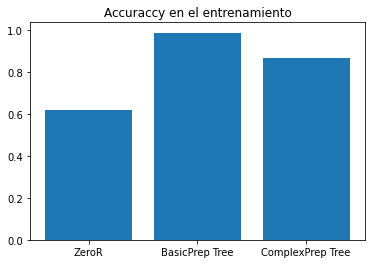

In [63]:
names = ['ZeroR', 'BasicPrep Tree', 'ComplexPrep Tree']
values_train = [zeroR_train, basic_train, complex_train]
values_test = [zeroR_test, basic_test, complex_test]

plt.bar(names, values_train)
plt.title("Accuraccy en el entrenamiento")
plt.show

Por lo tanto, si observamos como responden los distintos clasificadores frente al conjunto de validación comprobamos que el árbol de decisión con un preprocesamiento básico que antes obtenia el mejor acierto ahora no lo es, esto se debe a que dicho clasificador estaba sobreajustando. En conclusión, hay que esperar a enfrentar nuestro modelo contra el conjunto de validación para comprobar cuál puede llegar a funcionar mejor.

<function matplotlib.pyplot.show(close=None, block=None)>

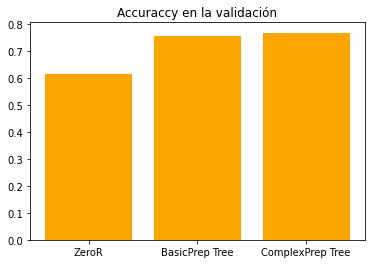

In [64]:
plt.bar(names, values_test,color=['orange'])
plt.title("Accuraccy en la validación")
plt.show

Aunque hemos realizado todo el proceso siempre respetando el conjunto de validación y, además, respetando la proporción de la variable clase puede ser que dicha división entre train y test favorezca o perjudique a los resultados obtenidos. Por lo tanto, para obtener una mejor aproximación realizaremos una **5-Cross Validation** en la que diviremos nuestro conjunto de datos en 5 carpetas con la misma proporción al ser stratified, además, realizaremos dicho proceso 5.

In [65]:
data_copy = data.copy()
X = data_copy.drop(**arguments)
y = data_copy[target]

Para realizar lo comentado utilizaremos `RepeatedStratifiedKFold`.

In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

zeroR_cv, basic_cv, complex_cv = 0, 0, 0
niter = 0
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    zeroR_cv += evaluate(zeroR_pipeline, X_train, y_train, X_test, y_test)
    basic_cv += evaluate(basic_pipeline, X_train, y_train, X_test, y_test)
    complex_cv += evaluate(complex_pipeline, X_train, y_train, X_test, y_test)

    niter += 1

zeroR_cv = zeroR_cv/niter
basic_cv = basic_cv/niter
complex_cv = complex_cv/niter

In [67]:
print("ZeroR: ",zeroR_cv)
print("Basic preprocessing Tree: ", basic_cv)
print("Complex preprocessing Tree: ", complex_cv)

ZeroR:  0.6161634548992533
Basic preprocessing Tree:  0.7865093214487479
Complex preprocessing Tree:  0.7995254535182977


Cuando aplicamos Cross Validation somos capaces de promediar el resultado de nuestros modelos, por lo tanto, será un resultado con mayor peso frente al realizada tras una división aleatoria dado que dicho promedio hace que el resultado se próximo al de la realidad. 

<function matplotlib.pyplot.show(close=None, block=None)>

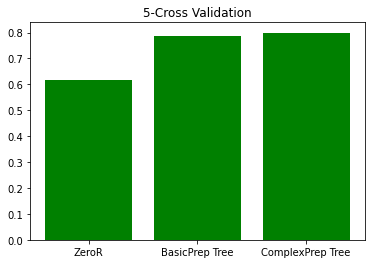

In [68]:
values_cv = [zeroR_cv, basic_cv, complex_cv]

plt.bar(names, values_cv,color=['green'])
plt.title("5-Cross Validation")
plt.show